In [1]:
# from nltk.tokenize import word_tokenize
# from nltk.tokenize import WordPunctTokenizer
# from tensorflow.keras.preprocessing.text import text_to_word_sequence
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from textblob import TextBlob, Word
from gensim.models import CoherenceModel
from matplotlib import pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import platform
import matplotlib
import time
import re
import gensim
import matplotlib.pyplot as plt

In [3]:
period_1 = pd.read_excel('period1.xlsx')
period_2 = pd.read_excel('period2.xlsx')
period_3 = pd.read_excel('period3.xlsx')

In [4]:
tokenizer = RegexpTokenizer('[\w]+')
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

# Period 1

In [5]:
texts1, sentence1 = [], []

# 불용어 목록
stop_words_2 = ['people', 'get', 'free', 'time', 'one', 'data', 'real', 'help', 'new', '2017', 'de', 'make', 'offer', 'u', 'also', 'seo', 'com', 'cake', 'job',
                'best', 'company', 'way', 'find', 'e', 'la', 'un', 'medium', 'need', 'classified', 'preserve', 'king',
                'india', 'och', 'like', 'para', 'en', 'los', 'que', 'fan', 'gives', 'u', 'platform', 'user', 'based', 'product', '2019', 'will', 'founded', 'provides', '1']

for w in period_1['Full Description']:
    try:
        raw = w.lower()
    except AttributeError:
        continue
    tokens = tokenizer.tokenize(raw)
    
    # 내장된 사전형 불용어 제거
    stopped_tokens = [i for i in tokens if not i in stop_words]
    
    # 사용자 지정 불용어 제거하고, 2글자 이상 단어만 남기기
    stopped_tokens = [i for i in stopped_tokens if (not i in stop_words_2) & (len(i) > 2)] # 사용자 지정 불용어 제거
    texts1.append(stopped_tokens)
    
dictionary1 = corpora.Dictionary(texts1)

corpus1 = [dictionary1.doc2bow(text) for text in texts1]

In [70]:
ldamodel1 = gensim.models.ldamodel.LdaModel(corpus1, num_topics=6, id2word = dictionary1, random_state = 3)

In [71]:
ldamodel1.print_topics(num_words=20)

[(0,
  '0.015*"training" + 0.011*"sports" + 0.010*"talent" + 0.006*"companies" + 0.006*"skills" + 0.006*"jobs" + 0.006*"employees" + 0.006*"candidates" + 0.006*"recruitment" + 0.005*"career" + 0.005*"hiring" + 0.004*"players" + 0.004*"tech" + 0.004*"hire" + 0.004*"work" + 0.004*"employers" + 0.003*"startup" + 0.003*"teams" + 0.003*"team" + 0.003*"workforce"'),
 (1,
  '0.009*"online" + 0.008*"app" + 0.008*"service" + 0.008*"users" + 0.007*"travel" + 0.006*"home" + 0.005*"allows" + 0.005*"food" + 0.005*"easy" + 0.004*"customers" + 0.004*"delivery" + 0.004*"marketplace" + 0.004*"use" + 0.004*"money" + 0.004*"local" + 0.004*"offers" + 0.004*"services" + 0.003*"price" + 0.003*"available" + 0.003*"payment"'),
 (2,
  '0.011*"marketing" + 0.008*"online" + 0.008*"social" + 0.008*"digital" + 0.007*"world" + 0.007*"content" + 0.007*"media" + 0.006*"create" + 0.005*"design" + 0.005*"experience" + 0.005*"products" + 0.005*"website" + 0.005*"business" + 0.004*"brands" + 0.004*"brand" + 0.004*"web" +

# Period 2

In [5]:
texts2, sentence2 = [], []

# 불용어 목록
stop_words_2 = ['people', 'get', 'free', 'time', 'one', 'data', 'real', 'help', 'new', '2017', 'de', 'make', 'offer', 'u', 'also', 'seo', 'com', 'cake', 'job',
                'best', 'company', 'way', 'find', 'e', 'la', 'un', 'medium', 'need', 'classified', 'preserve', 'king',
                'india', 'och', 'like', 'para', 'en', 'los', 'que', 'fan', 'gives', 'u', 'platform', 'user', 'based', 'product', '2019', 'will', 'founded', 'provides', '1',
                'services', 'use', 'using', 'products', 'solutions', 'brands']

for w in period_2['Full Description']:
    try:
        raw = w.lower()
    except AttributeError:
        continue
    else:
        sentence2.append(w)
    tokens = tokenizer.tokenize(raw)
    
    # 내장된 사전형 불용어 제거
    stopped_tokens = [i for i in tokens if not i in stop_words]
    
    # 사용자 지정 불용어 제거하고, 2글자 이상 단어만 남기기
    stopped_tokens = [i for i in stopped_tokens if (not i in stop_words_2) & (len(i) > 2)] # 사용자 지정 불용어 제거
    texts2.append(stopped_tokens)
    
dictionary2 = corpora.Dictionary(texts2)

corpus2 = [dictionary2.doc2bow(text) for text in texts2]

In [6]:
ldamodel2 = gensim.models.ldamodel.LdaModel(corpus2, num_topics=7, id2word = dictionary2, random_state = 3)

In [53]:
t1, t2, t3, t4, t5, t6, t7 = 0, 0, 0, 0, 0, 0, 0

In [66]:
for i in ldamodel2.get_document_topics(corpus2):
    for j in i:
        if j[0] == 0:
            t1 += j[1] * 100
        elif j[0] == 1:
            t2 += j[1] * 100
        elif j[0] == 2:
            t3 += j[1] * 100
        elif j[0] == 3:
            t4 += j[1] * 100
        elif j[0] == 4:
            t5 += j[1] * 100
        elif j[0] == 5:
            t6 += j[1] * 100
        elif j[0] == 6:
            t7 += j[1] * 100

In [70]:
t_sum = t1 + t2 + t3 + t4 + t5 + t6 + t7

print('topic 1의 비중: ', (t1 / t_sum) * 100); 
print('topic 2의 비중 : ',(t2 / t_sum) * 100); 
print('topic 3의 비중 : ',(t3 / t_sum) * 100); 
print('topic 4의 비중 : ',(t4 / t_sum) * 100); 
print('topic 5의 비중 : ',(t5 / t_sum) * 100); 
print('topic 6의 비중 : ',(t6 / t_sum) * 100); 
print('topic 7의 비중 : ',(t7 / t_sum) * 100);

topic 1의 비중:  11.443146550448557
topic 2의 비중 :  25.04629433113143
topic 3의 비중 :  15.744745517011449
topic 4의 비중 :  13.036964133932669
topic 5의 비중 :  15.642057270121468
topic 6의 비중 :  8.47545917761809
topic 7의 비중 :  10.611333019736335


In [20]:
len(corpus2) # 총 문서의 개수

46840

In [36]:
ldamodel2.print_topics(num_words=20)

[(0,
  '0.035*"marketing" + 0.026*"digital" + 0.017*"development" + 0.017*"media" + 0.015*"design" + 0.014*"content" + 0.013*"business" + 0.012*"web" + 0.010*"social" + 0.009*"website" + 0.009*"brand" + 0.008*"agency" + 0.008*"online" + 0.007*"sales" + 0.006*"clients" + 0.006*"news" + 0.006*"businesses" + 0.005*"search" + 0.005*"advertising" + 0.005*"creative"'),
 (1,
  '0.010*"service" + 0.007*"software" + 0.007*"management" + 0.006*"app" + 0.006*"users" + 0.006*"solution" + 0.006*"customers" + 0.005*"cloud" + 0.005*"business" + 0.005*"mobile" + 0.005*"system" + 0.004*"technology" + 0.004*"offers" + 0.004*"access" + 0.004*"allows" + 0.004*"manage" + 0.004*"end" + 0.004*"businesses" + 0.003*"companies" + 0.003*"customer"'),
 (2,
  '0.010*"financial" + 0.009*"digital" + 0.009*"business" + 0.009*"companies" + 0.009*"technology" + 0.009*"market" + 0.007*"global" + 0.007*"investment" + 0.006*"capital" + 0.006*"world" + 0.005*"blockchain" + 0.005*"investors" + 0.005*"growth" + 0.004*"indust

# Period 3

In [71]:
texts3, sentence3 = [], []

# 불용어 목록
stop_words_2 = ['people', 'get', 'free', 'time', 'one', 'data', 'real', 'help', 'new', '2017', 'de', 'make', 'offer', 'u', 'also', 'seo', 'com', 'cake', 'job',
                'best', 'company', 'way', 'find', 'e', 'la', 'un', 'medium', 'need', 'classified', 'preserve', 'king',
                'india', 'och', 'like', 'para', 'en', 'los', 'que', 'fan', 'gives', 'u', 'platform', 'user', 'based', 'product', '2019', 'will', 'founded', 'provides', '1',
                'services', 'use', 'using', 'products', 'solutions', '2021', 'businesses']

for w in period_3['Full Description']:
    try:
        raw = w.lower()
    except AttributeError:
        continue
    else:
        sentence3.append(w)
    tokens = tokenizer.tokenize(raw)
    
    # 내장된 사전형 불용어 제거
    stopped_tokens = [i for i in tokens if not i in stop_words]
    
    # 사용자 지정 불용어 제거하고, 2글자 이상 단어만 남기기
    stopped_tokens = [i for i in stopped_tokens if (not i in stop_words_2) & (len(i) > 2)] # 사용자 지정 불용어 제거
    texts3.append(stopped_tokens)
    
dictionary3 = corpora.Dictionary(texts3)

corpus3 = [dictionary3.doc2bow(text) for text in texts3]

In [72]:
ldamodel3 = gensim.models.ldamodel.LdaModel(corpus3, num_topics=7, id2word = dictionary3, random_state = 6)

In [74]:
topic_1, topic_2, topic_3, topic_4, topic_5, topic_6, topic_7 = 0, 0, 0, 0, 0, 0, 0

In [75]:
for i in ldamodel2.get_document_topics(corpus3):
    for j in i:
        if j[0] == 0:
            topic_1 += j[1] * 100
        elif j[0] == 1:
            topic_2 += j[1] * 100
        elif j[0] == 2:
            topic_3 += j[1] * 100
        elif j[0] == 3:
            topic_4 += j[1] * 100
        elif j[0] == 4:
            topic_5 += j[1] * 100
        elif j[0] == 5:
            topic_6 += j[1] * 100
        elif j[0] == 6:
            topic_7 += j[1] * 100

In [76]:
t_sum = topic_1 + topic_2 + topic_3 + topic_4 + topic_5 + topic_6 + topic_7

print('topic 1의 비중: ', (topic_1 / t_sum) * 100); 
print('topic 2의 비중 : ',(topic_2 / t_sum) * 100); 
print('topic 3의 비중 : ',(topic_3 / t_sum) * 100); 
print('topic 4의 비중 : ',(topic_4 / t_sum) * 100); 
print('topic 5의 비중 : ',(topic_5 / t_sum) * 100); 
print('topic 6의 비중 : ',(topic_6 / t_sum) * 100); 
print('topic 7의 비중 : ',(topic_7 / t_sum) * 100);

topic 1의 비중:  7.965477199560238
topic 2의 비중 :  21.15600609539809
topic 3의 비중 :  19.548882675450756
topic 4의 비중 :  13.628429518411203
topic 5의 비중 :  16.733457709622407
topic 6의 비중 :  10.405409475181358
topic 7의 비중 :  10.562337326375948


In [11]:
ldamodel3.print_topics(num_words=20)

[(0,
  '0.014*"online" + 0.007*"crypto" + 0.007*"market" + 0.006*"payment" + 0.006*"business" + 0.006*"customers" + 0.006*"marketplace" + 0.005*"shopping" + 0.005*"blockchain" + 0.005*"sell" + 0.005*"buy" + 0.005*"users" + 0.005*"payments" + 0.005*"decentralized" + 0.004*"store" + 0.004*"trading" + 0.004*"digital" + 0.004*"commerce" + 0.004*"world" + 0.003*"exchange"'),
 (1,
  '0.011*"food" + 0.008*"delivery" + 0.007*"energy" + 0.006*"sustainable" + 0.005*"supply" + 0.005*"local" + 0.005*"technology" + 0.004*"carbon" + 0.004*"customers" + 0.004*"waste" + 0.004*"chain" + 0.004*"power" + 0.004*"electric" + 0.004*"construction" + 0.003*"service" + 0.003*"home" + 0.003*"manufacturing" + 0.003*"logistics" + 0.003*"industry" + 0.003*"provide"'),
 (2,
  '0.022*"marketing" + 0.021*"digital" + 0.017*"business" + 0.012*"development" + 0.011*"design" + 0.009*"management" + 0.009*"software" + 0.009*"media" + 0.009*"web" + 0.007*"team" + 0.007*"sales" + 0.007*"clients" + 0.006*"service" + 0.006*"cu

In [39]:
for i, topic_list in enumerate(ldamodel3[corpus3]):
    if i==1000000000:
        break
    if (topic_list[0][0] == 6) & (topic_list[0][1] >= 0.5):
        print('{0}번째 문서'.format(i+1), end='\t')
        print(topic_list)
        print()
        print(sentence3[i])
    else:
        continue
    print('=' * 80)

44번째 문서	[(6, 0.97134125)]

For ambitious e-commerce businesses around the world; we developed the most advanced tool to create a mobile app as powerful and as simple as possible.  We know how long, tiring, and frustrating mobile app projects are. This is why our solution is geared towards mobilizing your business in three steps; without any coding knowledge!
111번째 문서	[(6, 0.9522469)]

Travis is social network for travel, bringing together personalised recommendations by travellers and creators, with functionality to map, plan, book and collaborate on future trips.
173번째 문서	[(6, 0.9746912)]

CredFine is an Indian Fintech company focused on offering a range of financial products to customers, such as Credit cards and Loans. Our VISION is to revolutionize the financial marketplace in India with easy access to financial products to customers as per tailormade requirements. Our Cutting-edge technology, financial expertise, and realistic advice enable the customer to make informed and right 

1532번째 문서	[(6, 0.96640587)]

Morada Uno underwrites and insures house rentals by equipping real estate professionals with tools and technology. The company aims to simplify and create trust and security in real estate transactions, promoting fairness in every interaction, and promoting a positive change in the mentality and way of doing things in Mexico.
2113번째 문서	[(6, 0.9428296)]

Xspaced is helping landlords and tenants pay rent on a flexible schedule and create installment plans for missed rent and security deposits.
2608번째 문서	[(6, 0.9495708)]

CollateralEdge is an innovative fintech platform that provides community and regional banks with a flexible, automated risk management solution to strengthen the credit profile on individual corporate loans.
2622번째 문서	[(6, 0.95227456)]

PHYTunes is staffed with experts in communication theory with extensive experience in the telecommunications industry. We have a passion for building solutions that meet the ever-changing connectivity requirem

7649번째 문서	[(6, 0.96825117)]

Okify is a proptech startup that is revolutionizing the move-in process in the real estate industry.   We provide customers with a platform where they can create their solvency profile and manage all home services and payments, making the process of moving much easier and faster, while providing security that payments and services are up to date to agents and landlords.
7928번째 문서	[(6, 0.95714027)]

Advia is designed to pair you with an expert advisor in the answers you are looking for. Whether you need relationship advice, are struggling at work, or need a spiritual counselor for guidance, our advisors are licensed and verified to help you find clarity in any problem.
8262번째 문서	[(6, 0.9658315)]

Avala empowers everyone with access to universal basic opportunity. Humans have an abundance of potential, but most don't have access to even the most basic opportunities. Avala believe's that access to opportunity should be a basic human right, and is doing everyth

13196번째 문서	[(6, 0.9574494)]

List Bloc is a social question & answer platform that connects people from around the world to share knowledge, ask questions, find answers to questions and share content across various topics and interests.
13236번째 문서	[(6, 0.9549639)]

At allawee we are unlocking credit access, with real-time financial data insights delivered instantly via API’s & Radar Dashboard.  We are using globally shared standards like FICO to build the future of credit.
13554번째 문서	[(6, 0.98711085)]

GurukulMate is a fastest growing e-learning platform that provides LIVE face-to-face online tuitions for K-12 students of grades 1 to 10.  1:6 Teaching Model: We believe every kid has his/her own learning curve and hence needs personalized learning to succeed academically. LIVE Classes: Similar to the offline classes, we teach students via LIVE online classes, but much better in terms of access to the best teachers. Deep Engagement: Our teaching methodology makes sure that teachers and s

20298번째 문서	[(6, 0.9426478)]

Our mission is to make buying and owning a home as simple as possible. We leverage technology, to automate and simplify the process into a seamless digital experience.
20667번째 문서	[(6, 0.9446978)]

EUIBA is a platform created for users. In platform is so easy to add your company, create and share events, list job openings, add properties and cars for sale/rent.
20684번째 문서	[(6, 0.9411708)]

HH Homes Realty Brokerage strives to make your experience of buying and selling comfortable and free of any concerns. Our team is dedicated to iffer help every step of the way!
20897번째 문서	[(6, 0.9426859)]

we proud to be the fair seller in the world. our path is always to give integrity to our customers. the better. 99Ninetynine.co.uk under licensed 99Ninetynine, Ltd.
21503번째 문서	[(6, 0.9629707)]

半区App is a leading career development&social networking communtiy startup for college students. Students can post, join or create communities, join or post opportunities, and get 

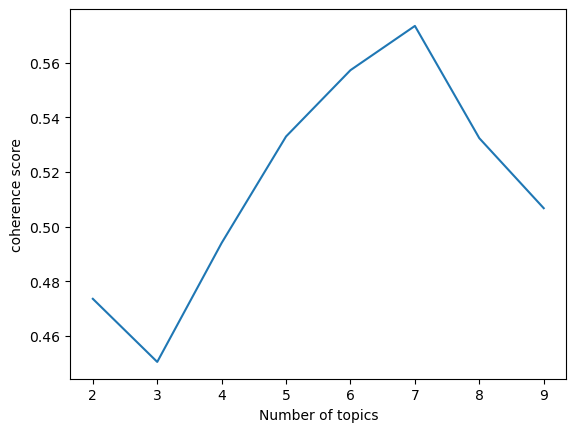

In [99]:
coherence_values = []
for i in range(2, 10):
    ldamodel2 = gensim.models.ldamodel.LdaModel(corpus2, num_topics = i, id2word=dictionary2)
    coherence_model_lda = CoherenceModel(model=ldamodel2, texts = texts2, dictionary=dictionary2, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

x = range(2, 10)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("coherence score")
plt.show()

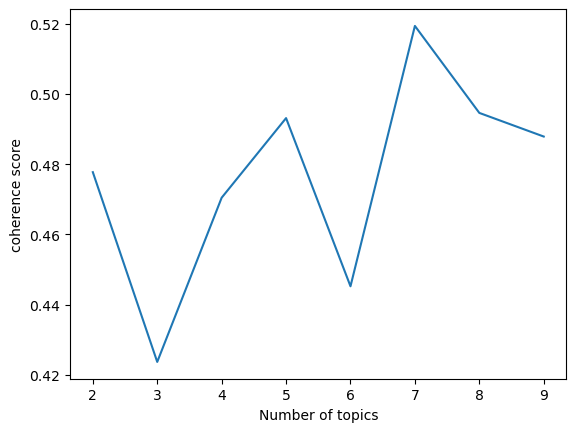

In [162]:
coherence_values = []
for i in range(2, 10):
    ldamodel3 = gensim.models.ldamodel.LdaModel(corpus3, num_topics = i, id2word=dictionary3)
    coherence_model_lda = CoherenceModel(model=ldamodel3, texts = texts3, dictionary=dictionary3, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

x = range(2, 10)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("coherence score")
plt.show()